## Topic:- AI-Driven personalized human-computer interaction using facial expression recognition in python

In [ ]:
# Unzip the dataset file
!unzip /content/FER-2013.zip

In [2]:
# Import All Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Flatten, Reshape, TimeDistributed, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
# Constants
IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 50
CLASS_NAMES = ['Angry', 'Happy', 'Sad', 'Neutral']
SELECTED_EMOTIONS = ['angry', 'happy', 'sad', 'neutral']

In [4]:
# Paths
train_dir = 'train/'
test_dir = 'test/'

* 1. Data Visualization

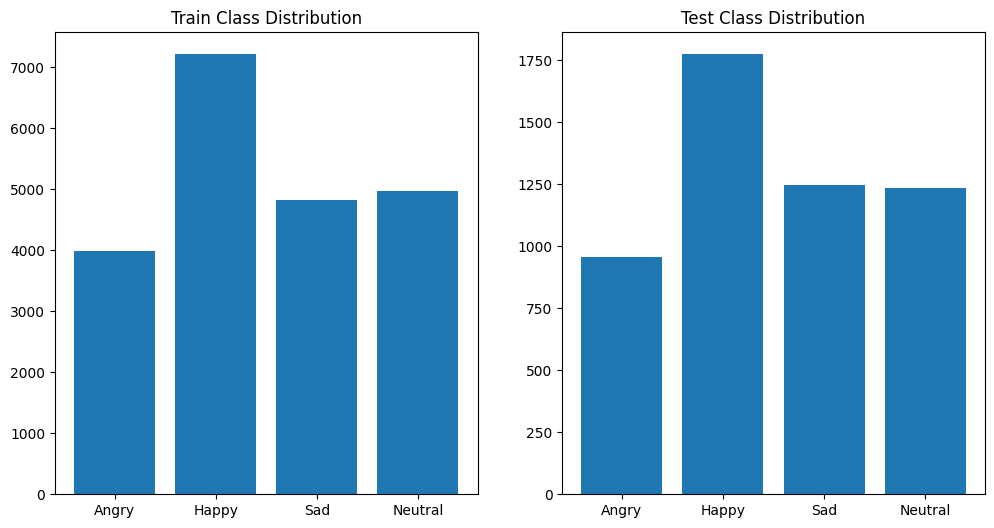

In [5]:
# class distribution graph
def plot_class_distribution():
    train_counts = []
    test_counts = []

    for emotion in SELECTED_EMOTIONS:
        train_counts.append(len(os.listdir(os.path.join(train_dir, emotion))))
        test_counts.append(len(os.listdir(os.path.join(test_dir, emotion))))

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(CLASS_NAMES, train_counts)
    plt.title('Train Class Distribution')

    plt.subplot(1, 2, 2)
    plt.bar(CLASS_NAMES, test_counts)
    plt.title('Test Class Distribution')
    plt.show()

plot_class_distribution()

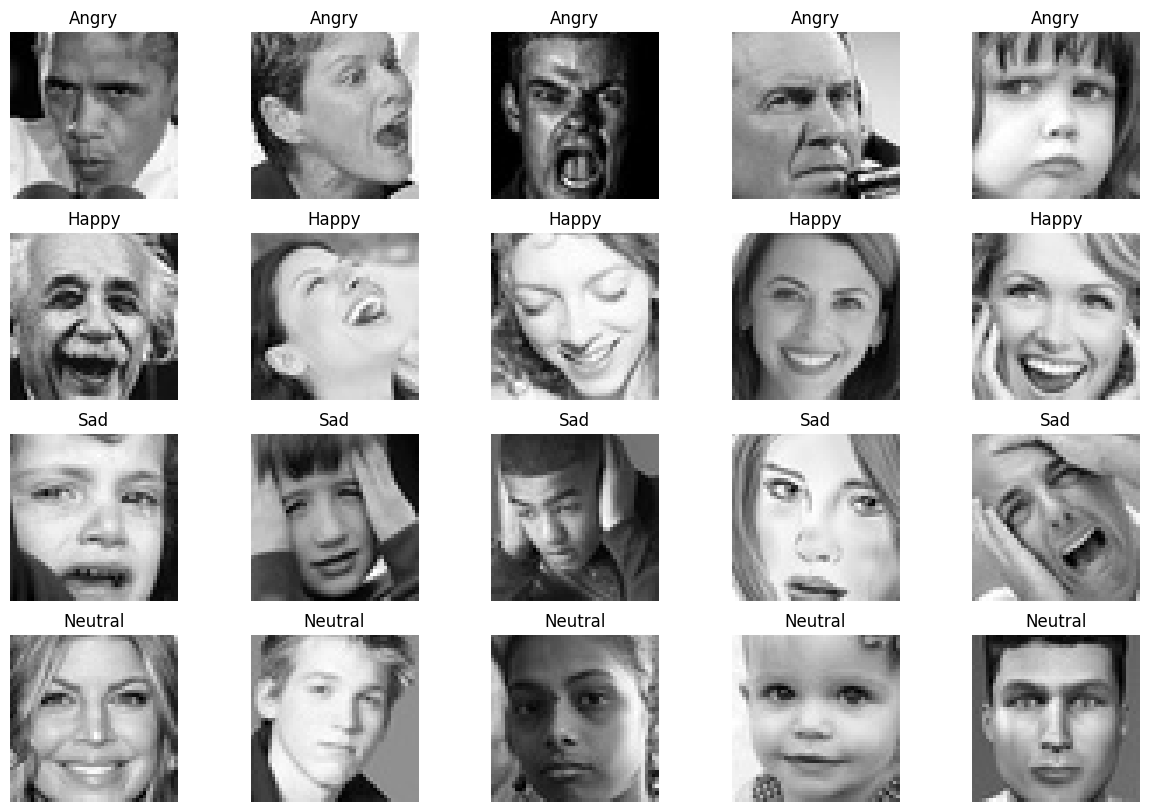

In [6]:
# sample images
def plot_sample_images():
    plt.figure(figsize=(15, 10))
    for i, emotion in enumerate(SELECTED_EMOTIONS):
        folder = os.path.join(train_dir, emotion)
        images = os.listdir(folder)[:5]
        for j, img_name in enumerate(images):
            img_path = os.path.join(folder, img_name)
            img = plt.imread(img_path)
            plt.subplot(4, 5, i*5 + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(CLASS_NAMES[i])
            plt.axis('off')
    plt.show()

plot_sample_images()

*  2. Data Preparation

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=SELECTED_EMOTIONS,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='training')

Found 16804 images belonging to 4 classes.


In [9]:
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=SELECTED_EMOTIONS,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    subset='validation')

Found 4201 images belonging to 4 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    color_mode='grayscale',
    classes=SELECTED_EMOTIONS,
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False)

Found 5212 images belonging to 4 classes.


* 3. CNN + LSTM Model

In [11]:
# CNN + LSTM Model
model = Sequential()

In [12]:
# CNN Layers with same padding to maintain dimensions
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Reshape((6*6, 128)))

# LSTM Layers
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
# 4. Training
callbacks = [EarlyStopping(patience=5, restore_best_weights=True),ModelCheckpoint('emotion_model.h5', save_best_only=True)]

In [19]:
history = model.fit(train_generator,validation_data=val_generator,epochs=EPOCHS,callbacks=callbacks)

Epoch 1/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 85s 323ms/step - accuracy: 0.6306 - loss: 0.8846 - val_accuracy: 0.5720 - val_loss: 1.0066
Epoch 2/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 86s 326ms/step - accuracy: 0.6315 - loss: 0.8805 - val_accuracy: 0.6082 - val_loss: 0.9429
Epoch 3/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 142s 326ms/step - accuracy: 0.6279 - loss: 0.8926 - val_accuracy: 0.6156 - val_loss: 0.9077
Epoch 4/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 85s 325ms/step - accuracy: 0.6245 - loss: 0.8882 - val_accuracy: 0.6003 - val_loss: 0.9271
Epoch 5/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 87s 331ms/step - accuracy: 0.6423 - loss: 0.8647 - val_accuracy: 0.6129 - val_loss: 0.9022
Epoch 6/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 85s 323ms/step - accuracy: 0.6376 - loss: 0.8777 - val_accuracy: 0.6179 - val_loss: 0.9091
Epoch 7/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 84s 321ms/step - accuracy: 0.6417 - loss: 0.8740 - val_accuracy: 0.5891 - val_loss: 0.9276
Epoch 8/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 143s 326ms/step - accuracy: 0.6496 - loss:

263/263 ━━━━━━━━━━━━━━━━━━━━ 86s 326ms/step - accuracy: 0.6583 - loss: 0.8348 - val_accuracy: 0.6215 - val_loss: 0.8793
Epoch 11/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.6492 - loss: 0.8488

263/263 ━━━━━━━━━━━━━━━━━━━━ 87s 329ms/step - accuracy: 0.6492 - loss: 0.8488 - val_accuracy: 0.6379 - val_loss: 0.8494
Epoch 12/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 86s 329ms/step - accuracy: 0.6497 - loss: 0.8511 - val_accuracy: 0.6434 - val_loss: 0.8653
Epoch 13/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.6605 - loss: 0.8336

263/263 ━━━━━━━━━━━━━━━━━━━━ 92s 350ms/step - accuracy: 0.6605 - loss: 0.8336 - val_accuracy: 0.6487 - val_loss: 0.8306
Epoch 14/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 86s 328ms/step - accuracy: 0.6585 - loss: 0.8354 - val_accuracy: 0.5687 - val_loss: 1.0088
Epoch 15/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 86s 326ms/step - accuracy: 0.6586 - loss: 0.8319 - val_accuracy: 0.6122 - val_loss: 0.8991
Epoch 16/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 92s 349ms/step - accuracy: 0.6646 - loss: 0.8265 - val_accuracy: 0.6348 - val_loss: 0.8495
Epoch 17/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 85s 325ms/step - accuracy: 0.6576 - loss: 0.8317 - val_accuracy: 0.6170 - val_loss: 0.8999
Epoch 18/50
263/263 ━━━━━━━━━━━━━━━━━━━━ 86s 327ms/step - accuracy: 0.6651 - loss: 0.8253 - val_accuracy: 0.5739 - val_loss: 0.9895


* 5. Evaluation

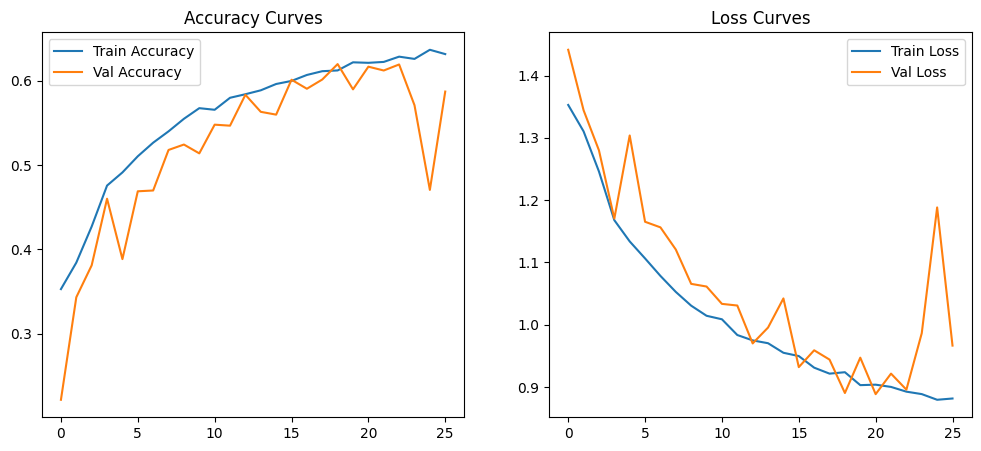

In [17]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss Curves')
plt.show()

In [26]:
# Confusion Matrix
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred)

fig = px.imshow(cm, text_auto=True, labels=dict(x="Predicted", y="True", color="Count"),
                x=CLASS_NAMES, y=CLASS_NAMES, color_continuous_scale='Blues')
fig.update_layout(title='Interactive Confusion Matrix')
fig.show()

82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step
